In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle (4).json to kaggle (4).json
User uploaded file "kaggle (4).json" with length 66 bytes


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge

100% 1.63G/1.63G [00:10<00:00, 164MB/s]
100% 1.63G/1.63G [00:10<00:00, 166MB/s]


In [0]:
%%capture
!unzip CORD-19-research-challenge.zip

In [0]:
!pip install sentence-transformers

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 573kB 4.1MB/s 
     |████████████████████████████████| 3.7MB 6.8MB/s 
     |████████████████████████████████| 890kB 31.0MB/s 
     |████████████████████████████████| 1.0MB 42.6MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=ae8af87f955650db79f02660f9e48220bddbc39048e97796abc6ae92698c81f7
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=27b7054838f6a6afeb2c8edffb94c37a91c6e3967f0397c417dd6f04c22bd01d
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sentence-transformers sacremoses


In [0]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import umap
import numpy as np
import torch
from tqdm.notebook import tqdm
import os
import json

In [0]:
model=SentenceTransformer('roberta-base-nli-mean-tokens')

In [49]:
working_list=[]
#paths = ["D:\\ANKIT\\CORD\\comm_use_subset\\pdf_json\\", "D:\\ANKIT\\CORD\\noncomm_use_subset\\pdf_json\\"]
paths = ["comm_use_subset/comm_use_subset/pdf_json/", "noncomm_use_subset/noncomm_use_subset/pdf_json/"]
for p in paths:
    for file in tqdm(os.listdir(p)):
        t=[]
        print('{} file of {} size read.'.format(file,os.stat(p+file).st_size))
        text_content = '' # combine title, abstract, and body text or articles
        working_dict = dict({"abstract": [], "body_text":[]})
        content = json.load(open(p+file,'r'))
        #print(type(content))
        working_dict['paper_id'] = content['paper_id']
        working_dict['path'] = p
        if 'metadata' in content and 'title' in content['metadata']:
            working_dict['title'] =[content['metadata']['title']]
            #print('found title')
        if 'metadata' in content and 'authors' in content['metadata']:
            for i in range(len(content['metadata']['authors'])):
                t.append(content['metadata']['authors'][i]['first'].capitalize()+' '+content['metadata']['authors'][i]['last'].capitalize()+',')
            working_dict['authors'] = t
            #print('found title')
            text_content = text_content  +' '+ content['metadata']['title']
        if 'abstract' in content:
            #print('found abstract')
            for abst in content['abstract'] :
                text_content = text_content+' '+abst['text']
                working_dict['abstract'].append(abst['text'])    
        if 'body_text' in content:
            #print('found body text')
            for bt in content['body_text'] :
                text_content = text_content+' '+bt['text']
                working_dict['body_text'].append(bt['text'])
        
        working_dict['text'] = [text_content]
        working_list.append(working_dict)

Streaming output truncated to the last 5000 lines.
883477472cfef01bbb0a10297e0f7268c0cee845.json file of 63973 size read.
6907124581ac28f6712e3676396cfc4a3b8a9502.json file of 98552 size read.
d739cf97cba31e655d6c7438b864d94297f59ba3.json file of 195984 size read.
cc61245f0f1817ac5d96a0cf9bce41377d6e4978.json file of 79910 size read.
3c1893f7c0ec143b4f173980381354e5cfe6416f.json file of 105242 size read.
4a80fc8045f1a85c35e038160bee95c2be0c2fd2.json file of 70282 size read.
cf08012c131b34b073bc10b82fcb6574b17d13b8.json file of 111499 size read.
67ad221f50d67a02b89b0ea67da2a74d6d463d16.json file of 82156 size read.
315f0a94d6ac0655e0e5defec4f9526641c76037.json file of 145202 size read.
4ec19e6a2799bf2bebe635732de198d04ddedf64.json file of 199147 size read.
7f8fc0ff30e4455d834e829db27b8d529b2920df.json file of 108940 size read.
215fb42f8f5f2ede1ed7e7b1561e51f494593578.json file of 179755 size read.
57d7804297acdd855f4f2e2a6903cf6ca04d323e.json file of 89353 size read.
90b97cb0a6ce9135c3a

1fe6e8c22714c1484434a2b5b334bedf7f216739.json file of 166341 size read.
fab32444594a7c25009ffcd48e91c923f5f0316f.json file of 36631 size read.
9e7e20f7b3fcd74b3f899215f18e096c30fec048.json file of 161282 size read.
5036d9acb850bbb3705be78b3ab64dec35d68b27.json file of 142252 size read.
c2263b536f0cdd99a4e09e96859c007d44cef013.json file of 61325 size read.
c6463593f45c19d4989336f52905704d1ec9b74e.json file of 138071 size read.
cf6a16717c4b118d2e8bca72fe7dd28c2f2c2cdb.json file of 128958 size read.
b8b13fd5a49e6193135315c97de14fb7b9936286.json file of 309257 size read.
b39580b3bf3af68ed88977c56efdca4d41816b10.json file of 138810 size read.
d095e5dd57f0cce04d19b803d2eff03b87febf8f.json file of 49917 size read.
92aca69f518fc394bd00b525898264893d9550af.json file of 151415 size read.
634128ea7d7736750e1c3cd0a48bb37843d06dac.json file of 171224 size read.
53f9b02ce4cc149507a9d402dcf9d4c191b3bb29.json file of 180581 size read.
35644bd7e541cc18e4aa1810ca2a501a4b61c18d.json file of 39034 size re

In [0]:
from pandas import json_normalize
df=json_normalize(working_list)
df=df.drop(columns=['path'],axis=0)

In [51]:
df.head()

,abstract,body_text,paper_id,title,authors,text
0,[Objective: Infections with the mosquito trans...,[Dengue is currently considered as the most im...,bc7b16d381d2acf67eb97db19f1686c90d72ecf1,"[Screening of melatonin, α-tocopherol, folic a...","[Atchara Paemanee,, Atitaya Hitakarun,, Sittir...","[ Screening of melatonin, α-tocopherol, folic ..."
1,[Background: Embryonated chicken eggs have bee...,[Over the past decades different expression sy...,58f68e82f134cf3549778fca86251ee61975b596,[High level expression of soluble glycoprotein...,"[Teresa Corral,, Lorena Ver,, Geneviève Mottet...",[ High level expression of soluble glycoprotei...
2,[Protein a-helical coiled coil structures that...,[Despite the important reduction in reported m...,04f4cff6c1a32e0edb50bdb8daf00f82708a5142,[Plasmodium vivax Antigen Discovery Based on A...,"[N Céspedes,, C Habel,, M Lopez-perez,, A Cast...",[ Plasmodium vivax Antigen Discovery Based on ...
3,[Virus-host interactions drive a remarkable di...,[Viruses represent a constantly evolving chall...,284a7df2b370e893122a58ce3af9a9d2daaab704,[A single vertebrate DNA virus protein disarms...,"[Don Gammon,, Sophie Duraffour,, Daniel Rozell...",[ A single vertebrate DNA virus protein disarm...
4,[],"[Emerging infectious diseases, such as severe ...",5734e3b81e16fe1976a129c5a0872716f3dd50b8,[A new coronavirus associated with human respi...,"[Fan Wu,, Su Zhao,, Bin Yu,, Yan-mei Chen,, We...",[ A new coronavirus associated with human resp...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12287 entries, 0 to 12286
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   abstract   12287 non-null  object
 1   body_text  12287 non-null  object
 2   paper_id   12287 non-null  object
 3   title      12287 non-null  object
 4   authors    12287 non-null  object
 5   text       12287 non-null  object
dtypes: object(6)
memory usage: 576.1+ KB


In [0]:
abstract_corpus,title_corpus,body_text,text=df['abstract'].tolist(),df['title'].tolist(),df['body_text'].tolist(),df['text'].tolist()

In [0]:
def extract_to_corpus(corpus_list):
  corpus_2=[]
  for i in corpus_list:
    if len(i)==0:   #If lists are empty,a cheeky trick.
      i.append(' ')
    corpus_2.append(i[0])
  return corpus_2

In [0]:
def prepare_encodings(format,corpus_list):
  if format=='tensor':
      encodings=model.encode(corpus_list,show_progress_bar=True,convert_to_numpy=False)
      return encodings
  elif format=='numpy':
      encodings=model.encode(corpus_list,show_progress_bar=True,convert_to_numpy=True)
      return encodings

In [0]:
def generate_WordCloud(corpus):
  from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
  stopwords = set(STOPWORDS)
  import matplotlib.pyplot as plt
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(corpus))
  plt.suptitle("Word Cloud for retrieved")
  plt.figure(figsize=[20,20])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("on")
  plt.show()

In [0]:
title_corpus=extract_to_corpus(title_corpus)

<Figure size 432x288 with 0 Axes>

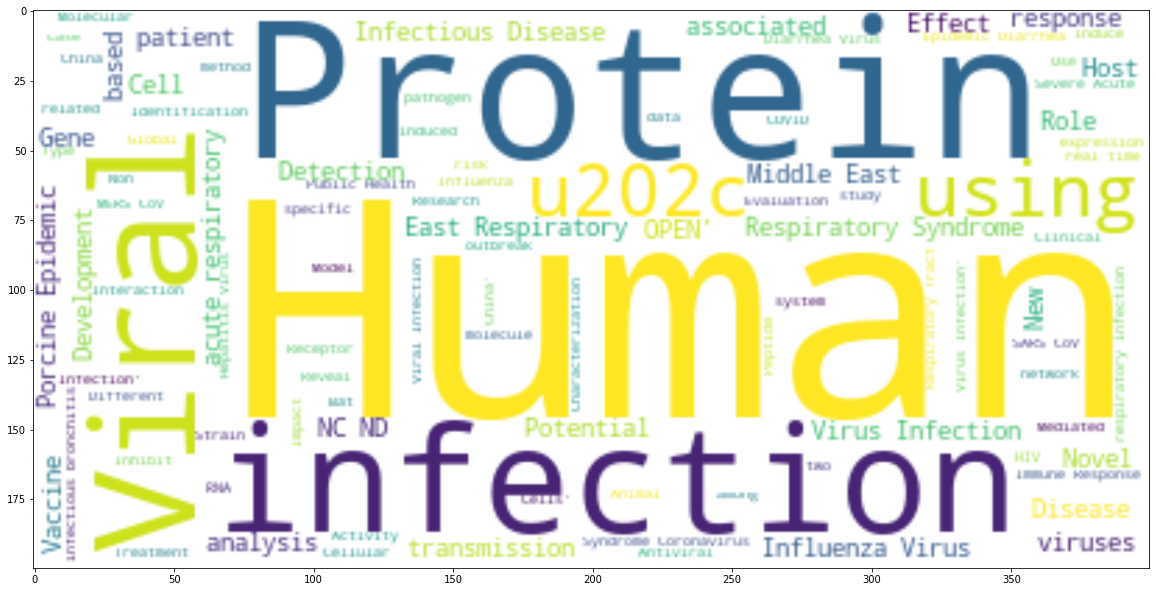

In [0]:
generate_WordCloud(title_corpus)

In [0]:
abstract_corpus=extract_to_corpus(abstract_corpus)

<Figure size 432x288 with 0 Axes>

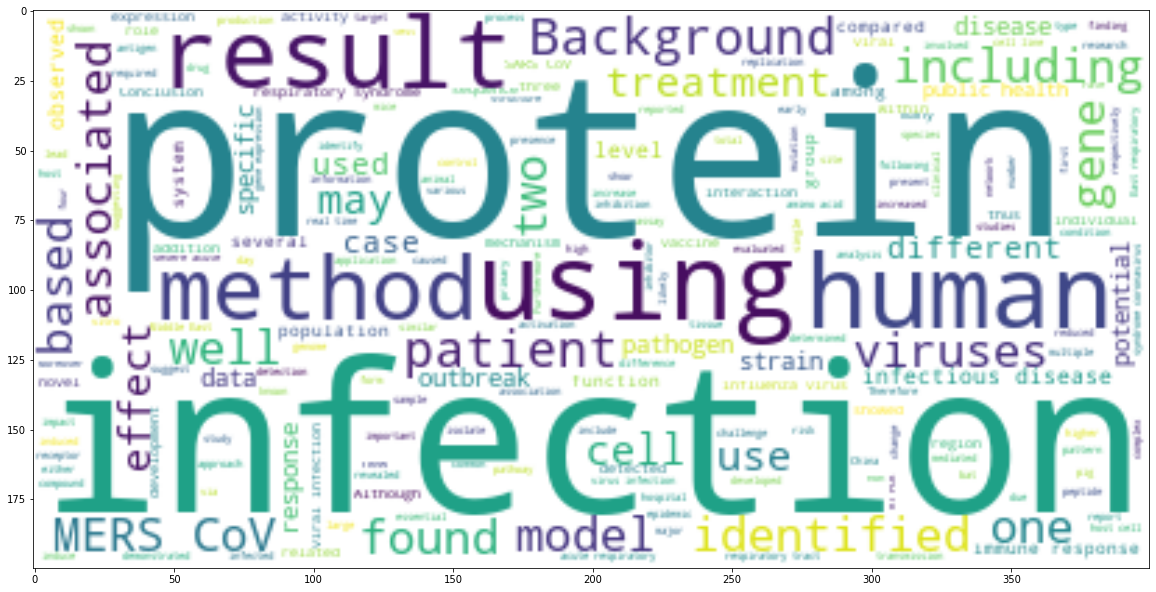

In [0]:
generate_WordCloud(abstract_corpus)

In [0]:
bodytext_corpus=extract_to_corpus(body_text)

<Figure size 432x288 with 0 Axes>

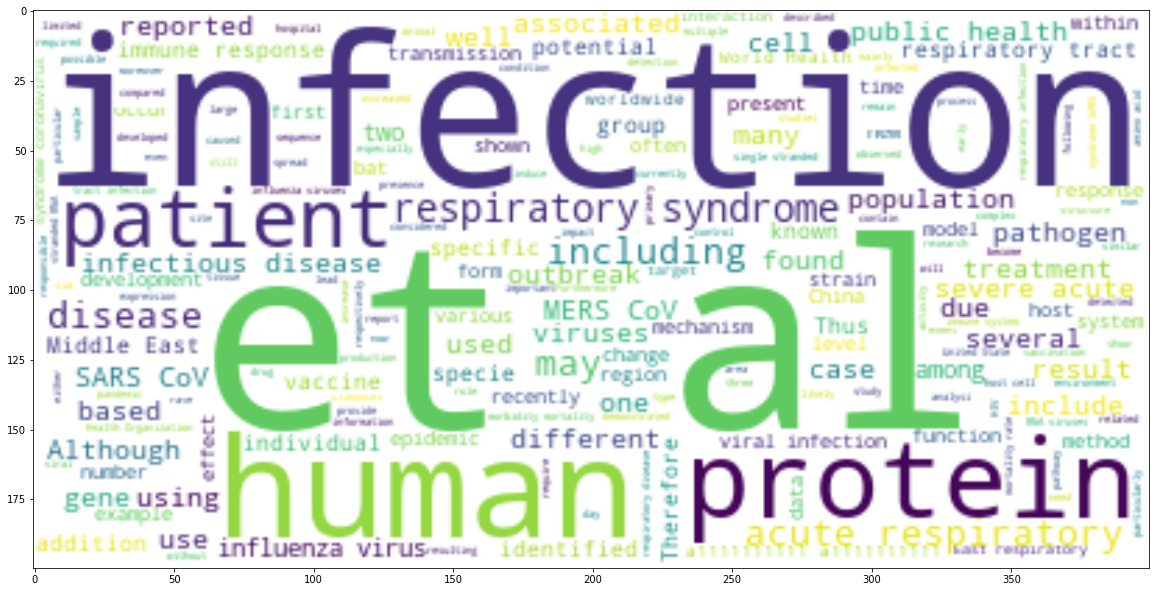

In [0]:
generate_WordCloud(bodytext_corpus)

In [0]:
maintext_corpus=extract_to_corpus(text)

<Figure size 432x288 with 0 Axes>

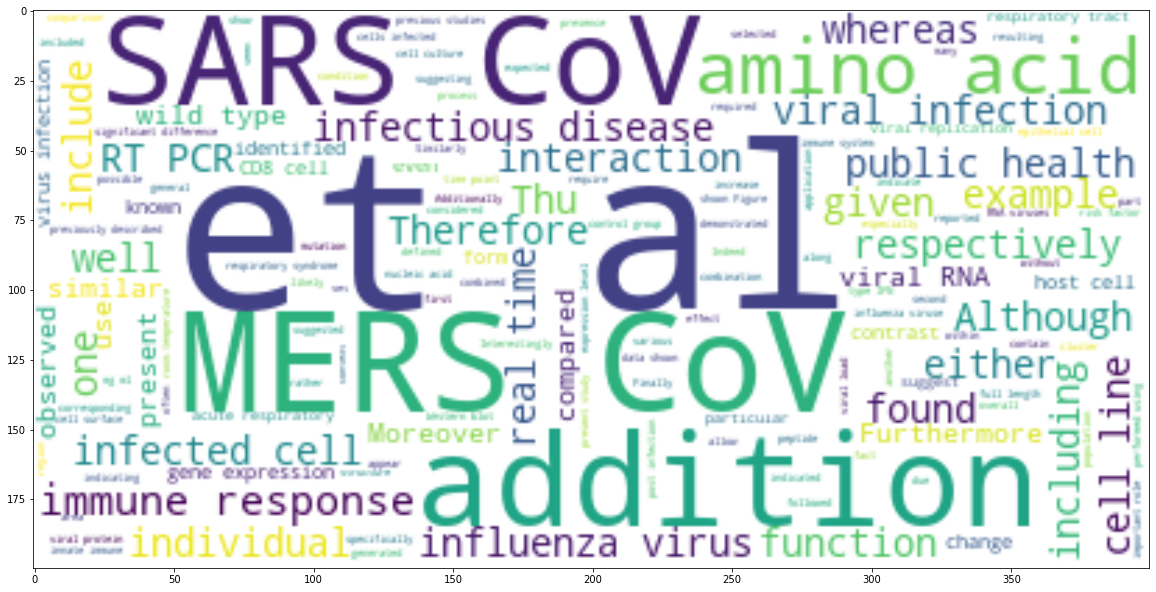

In [0]:
generate_WordCloud(maintext_corpus)

In [61]:
title_encodings=prepare_encodings('numpy',title_corpus)



Batches:   0%|          | 0/1536 [00:00<?, ?it/s]

Batches:   0%|          | 2/1536 [00:00<01:51, 13.74it/s]

Batches:   0%|          | 4/1536 [00:00<01:47, 14.28it/s]

Batches:   0%|          | 6/1536 [00:00<01:48, 14.12it/s]

Batches:   1%|          | 8/1536 [00:00<01:44, 14.57it/s]

Batches:   1%|          | 10/1536 [00:00<01:43, 14.70it/s]

Batches:   1%|          | 12/1536 [00:00<01:42, 14.83it/s]

Batches:   1%|          | 14/1536 [00:00<01:40, 15.08it/s]

Batches:   1%|          | 16/1536 [00:01<01:41, 15.00it/s]

Batches:   1%|          | 18/1536 [00:01<01:40, 15.16it/s]

Batches:   1%|▏         | 20/1536 [00:01<01:39, 15.18it/s]

Batches:   1%|▏         | 22/1536 [00:01<01:38, 15.30it/s]

Batches:   2%|▏         | 24/1536 [00:01<01:38, 15.39it/s]

Batches:   2%|▏         | 26/1536 [00:01<01:37, 15.42it/s]

Batches:   2%|▏         | 28/1536 [00:01<01:39, 15.14it/s]

Batches:   2%|▏         | 30/1536 [00:01<01:38, 15.25it/s]

Batches:   2%|▏         | 32/1536 [00:02<01:39, 15.

In [0]:
Title_encodings={}
for i in range(len(title_encodings)):
    Title_encodings.update({i:title_encodings[i]})

In [63]:
len(Title_encodings)

12287

In [64]:
dict(list(Title_encodings.items())[0: 2]) 


{0: array([-9.50674154e-03,  3.75352919e-01,  8.29529643e-01,  8.50008965e-01,
        -4.07588124e-01, -1.65869726e-03,  1.33061695e+00,  9.46251571e-01,
         6.76525896e-03,  3.43311250e-01,  1.56277984e-01,  1.32119939e-01,
         4.37308520e-01, -6.45928562e-01, -3.87986630e-01, -1.93907470e-01,
        -1.10338256e-01, -5.59258349e-02,  1.19654760e-01, -5.23601770e-01,
        -3.94669265e-01, -1.46847236e+00,  6.99758649e-01,  1.64255753e-01,
         2.15791821e+00, -2.34929129e-01, -3.83400559e-01, -2.47005582e-01,
        -2.65116841e-02, -1.13194227e+00, -4.90947485e-01,  4.70004797e-01,
         3.74885261e-01, -1.22202754e+00,  4.50295746e-01,  1.22843659e+00,
         1.99038231e+00,  1.78435564e-01,  3.25343534e-02, -1.86162293e-01,
        -5.32182992e-01,  1.30717993e+00, -9.69420187e-03,  6.26922429e-01,
         5.57833433e-01, -3.64202052e-01,  9.17848468e-01, -9.31265175e-01,
        -1.22132070e-01, -5.01791954e-01, -1.52769715e-01, -3.54592875e-02,
        -

We are applying KMeans++ algorithm to cluster semantically similar docs based on their titles.

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [0]:
clustering_model = KMeans(n_clusters=4,init='k-means++')
clustering_model.fit(title_encodings)
cluster_assignment = clustering_model.labels_
centroids = clustering_model.cluster_centers_


In [97]:
cluster_assignment
centroids

array([[ 0.32524145,  0.49459414,  0.17547033, ..., -1.72409407,
         0.25459148,  0.79714667],
       [ 1.05330998, -1.31962844, -0.07544183, ...,  0.11941126,
         0.56549369, -1.28054103],
       [-0.14310357,  0.16352744,  0.29737768, ..., -1.55672443,
        -0.0861786 ,  0.78130666],
       [ 0.26585632, -0.04766937,  0.10469655, ..., -1.48397391,
         0.06271915,  0.58307534]])

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
tred=pca.fit_transform(title_encodings)
cred=pca.fit_transform(centroids)

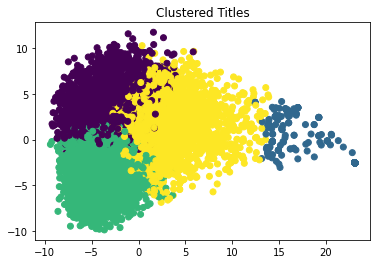

In [106]:
plt.title('Clustered Titles')
plt.scatter(tred[:, 0], tred[:, 1], c=cluster_assignment)

In [0]:
df['Group']=pd.Series(cluster_assignment)

In [108]:
df.head()

,abstract,body_text,paper_id,title,authors,text,Group
0,[Objective: Infections with the mosquito trans...,[Dengue is currently considered as the most im...,bc7b16d381d2acf67eb97db19f1686c90d72ecf1,"[Screening of melatonin, α-tocopherol, folic a...","[Atchara Paemanee,, Atitaya Hitakarun,, Sittir...","[ Screening of melatonin, α-tocopherol, folic ...",0
1,[Background: Embryonated chicken eggs have bee...,[Over the past decades different expression sy...,58f68e82f134cf3549778fca86251ee61975b596,[High level expression of soluble glycoprotein...,"[Teresa Corral,, Lorena Ver,, Geneviève Mottet...",[ High level expression of soluble glycoprotei...,2
2,[Protein a-helical coiled coil structures that...,[Despite the important reduction in reported m...,04f4cff6c1a32e0edb50bdb8daf00f82708a5142,[Plasmodium vivax Antigen Discovery Based on A...,"[N Céspedes,, C Habel,, M Lopez-perez,, A Cast...",[ Plasmodium vivax Antigen Discovery Based on ...,3
3,[Virus-host interactions drive a remarkable di...,[Viruses represent a constantly evolving chall...,284a7df2b370e893122a58ce3af9a9d2daaab704,[A single vertebrate DNA virus protein disarms...,"[Don Gammon,, Sophie Duraffour,, Daniel Rozell...",[ A single vertebrate DNA virus protein disarm...,0
4,[ ],"[Emerging infectious diseases, such as severe ...",5734e3b81e16fe1976a129c5a0872716f3dd50b8,[A new coronavirus associated with human respi...,"[Fan Wu,, Su Zhao,, Bin Yu,, Yan-mei Chen,, We...",[ A new coronavirus associated with human resp...,2


In [120]:
y=df['Group']

KeyError: ignored

In [118]:
df=df.drop(columns=['Group'],axis=0)

KeyError: ignored

In [0]:
df=df.drop(columns=['paper_id'],axis=0)

In [0]:
X=df.values

In [0]:
y=y.values

In [0]:
l=[list(y).count(0),list(y).count(1),list(y).count(2),list(y).count(3)]

In [135]:
l

[3017, 838, 4761, 3671]

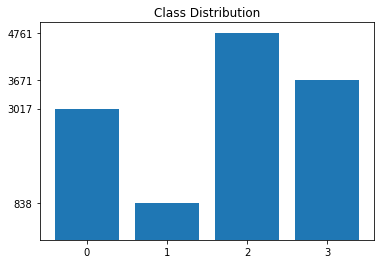

In [157]:
fig1, ax1 = plt.subplots()
ax1.bar(np.arange(4),height=l,)
plt.yticks(l)
plt.xticks(np.arange(4))
plt.title('Class Distribution')
plt.show()

In [0]:
pd.DataFrame(title_encodings).to_json('t_encodings.json')

In [164]:
abstract_encodings=prepare_encodings('numpy',abstract_corpus)



Batches:   0%|          | 0/1536 [00:00<?, ?it/s]

Batches:   0%|          | 1/1536 [00:00<02:45,  9.27it/s]

Batches:   0%|          | 3/1536 [00:00<02:25, 10.53it/s]

Batches:   0%|          | 5/1536 [00:00<02:10, 11.77it/s]

Batches:   0%|          | 7/1536 [00:00<01:59, 12.76it/s]

Batches:   1%|          | 9/1536 [00:00<01:51, 13.64it/s]

Batches:   1%|          | 11/1536 [00:00<01:51, 13.72it/s]

Batches:   1%|          | 13/1536 [00:00<01:48, 14.08it/s]

Batches:   1%|          | 15/1536 [00:01<01:45, 14.40it/s]

Batches:   1%|          | 17/1536 [00:01<01:44, 14.56it/s]

Batches:   1%|          | 19/1536 [00:01<01:40, 15.05it/s]

Batches:   1%|▏         | 21/1536 [00:01<01:39, 15.19it/s]

Batches:   1%|▏         | 23/1536 [00:01<01:40, 15.08it/s]

Batches:   2%|▏         | 25/1536 [00:01<01:38, 15.42it/s]

Batches:   2%|▏         | 27/1536 [00:01<01:36, 15.60it/s]

Batches:   2%|▏         | 29/1536 [00:01<01:35, 15.71it/s]

Batches:   2%|▏         | 31/1536 [00:02<01:35, 15.6

In [0]:
pd.DataFrame(abstract_encodings).to_json('abstract_encodings.json')